<a href="https://colab.research.google.com/github/AbdulahFaiz/Data-Mining/blob/main/Checkpoint_(2)_Prediksi_Cuaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Cuaca di Sulawesi Tenggara**

#**Import Library**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis proyek ini adalah untuk memprediksi cuaca di Sulawesi Tenggara berdasarkan faktor-faktor yang mempengaruhinya. Tujuannya adalah untuk membantu masyarakat, petani, nelayan, dan pihak terkait lainnya dalam mempersiapkan dan membuat keputusan tentang hal-hal yang terkait dengan cuaca dalam kehidupan sehari-hari mereka.

##**Assess Situation**

Memahami situasi yang mendasari analisis ini sangat penting karena cuaca di Sulawesi Tenggara sering dipengaruhi oleh perubahan iklim, musim kemarau, dan musim hujan, yang dapat memengaruhi pertanian, perikanan, dan berbagai aktivitas lainnya. Kemampuan untuk memprediksi cuaca dengan tepat dapat membantu mengurangi efek dari cuaca ekstrem.

##**Data Mining Goals**

Tujuan dari analisis data proyek ini adalah untuk mengembangkan model prediksi cuaca di Sulawesi Tenggara dengan mempertimbangkan faktor-faktor yang mempengaruhinya. Selain itu, analisis ini juga bertujuan untuk memahami pola cuaca, mengidentifikasi komponen utama yang mempengaruhi perubahan cuaca, dan memberikan informasi yang akurat dan bermanfaat bagi masyarakat dan pihak terkait.

##**Project Plan**

Rencana proyek akan dimulai dengan pengumpulan data cuaca dari sumber yang tersedia, termasuk data suhu udara, kelembaban udara, curah hujan, dan lama penyinaran matahari. Selanjutnya, data akan dieksplorasi untuk mengidentifikasi pola-pola cuaca yang menarik serta korelasi dan hubungan antar variabel cuaca. Evaluasi kualitas data akan dilakukan untuk mengidentifikasi dan menangani masalah data. Langkah-langkah ini penting untuk memastikan bahwa model prediksi cuaca yang dikembangkan dapat memberikan hasil yang akurat dan berguna bagi pengguna akhir.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data yang saya gunakan merupakan data cuaca harian sulawesi tenggara, mulai dari tanggal 01 januari 2022 sampai dengan 20 desember 2023.
Data tersebut berdasarkan dari website BMKG.

https://www.kaggle.com/datasets/ratnasarii/prediksi-cuaca/data

https://raw.githubusercontent.com/AbdulahFaiz/Data-Mining/main/data_cuaca.csv

In [ ]:
df = pd.read_csv('data_cuaca.csv', delimiter=';')
df.head()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0


##**Describe Data**

####Informasi Dasar

In [ ]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian

print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)
print(df)

Jumlah baris: 719
Jumlah kolom: 9
      Thn  bln  tgl  temp_min  temp_max  temp_rata-rata  lembab_rata-rata  \
0    2022    1    1      24.0      32.2            27.0              84.0   
1    2022    1    2      24.0      31.2            25.8              91.0   
2    2022    1    3      22.4      32.0            26.3              86.0   
3    2022    1    4      24.0      29.8            26.7              87.0   
4    2022    1    5      23.4      32.2            26.9              85.0   
..    ...  ...  ...       ...       ...             ...               ...   
714  2023   12   16      24.2      33.2            29.9              77.0   
715  2023   12   17      24.8      35.0            30.6              72.0   
716  2023   12   18      24.0      33.6            29.9              77.0   
717  2023   12   19      23.4      34.4            31.0              71.0   
718  2023   12   20      24.8      35.3            31.8              62.0   

       ch  cahaya_jam  
0     1.0        

Jadi pada data saya terdapat 719 baris dan 9 kolom. Kolom yang terdapat pada data saya ialah
- Thn
- bln
- tgl
- temp_min: Temperatur minimum (°C)
- temp_max: Temperatur maksimum (°C)
- temp_rata-rata: Temperatur rata-rata (°C)
- lembab_rata-rata: Kelembapan rata-rata (%)
- ch: Curah hujan (mm)
- cahaya_jam: Lamanya penyinaran matahari (jam).

####Informasi Lanjutan

In [ ]:
#Ketikan kode di sini, untuk menampilkan informasi lengkap dari dataset kalian

print("Informasi lengkap dataset:")
print(df.info())

Informasi lengkap dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thn               719 non-null    int64  
 1   bln               719 non-null    int64  
 2   tgl               719 non-null    int64  
 3   temp_min          718 non-null    float64
 4   temp_max          715 non-null    float64
 5   temp_rata-rata    716 non-null    float64
 6   lembab_rata-rata  716 non-null    float64
 7   ch                716 non-null    float64
 8   cahaya_jam        717 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 50.7 KB
None


- Thn: Menunjukkan tahun pengamatan cuaca. Terdapat 719 entri non-null dengan tipe data int64.

- bln: Merupakan bulan pengamatan cuaca dalam format numerik (1-12). Terdapat 719 entri non-null dengan tipe data int64.

- tgl: Menunjukkan tanggal pengamatan cuaca. Terdapat 719 entri non-null dengan tipe data int64.

- temp_min: Temperatur minimum (dalam °C) pada hari pengamatan. Terdapat 718 entri non-null dengan tipe data float64.

- temp_max: Temperatur maksimum (dalam °C) pada hari pengamatan. Terdapat 715 entri non-null dengan tipe data float64.

- temp_rata-rata: Temperatur rata-rata (dalam °C) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- lembab_rata-rata: Kelembapan rata-rata (dalam %) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- ch: Curah hujan (dalam mm) pada hari pengamatan. Terdapat 716 entri non-null dengan tipe data float64.

- cahaya_jam: Lamanya penyinaran matahari (dalam jam) pada hari pengamatan. Terdapat 717 entri non-null dengan tipe data float64.

####Informasi Statistik Deskriptif

In [ ]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian

# df = pd.read_csv('data_cuaca.csv', delimiter=';')
df.describe()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
count,719.00000,719.000000,719.000000,718.000000,715.000000,716.000000,716.000000,716.000000,717.000000
mean,2022.49235,6.442281,15.563282,37.401950,46.165734,27.206285,83.681564,998.574441,32.383821
std,0.50029,3.408852,8.767571,372.284493,372.741102,1.459084,6.636348,2800.073672,527.495165
min,2022.00000,1.000000,1.000000,18.200000,20.000000,23.700000,57.000000,0.000000,0.000000
25%,2022.00000,3.500000,8.000000,23.200000,31.200000,26.300000,80.000000,0.000000,2.300000
50%,2022.00000,6.000000,15.000000,23.800000,32.400000,27.000000,84.000000,1.400000,4.400000
75%,2023.00000,9.000000,23.000000,24.400000,33.350000,27.900000,88.000000,12.350000,6.700000
max,2023.00000,12.000000,31.000000,9999.000000,9999.000000,32.800000,99.000000,8888.000000,9999.000000


Count (Jumlah): Menunjukkan jumlah entri atau observasi yang terdapat dalam setiap kolom. Nilai ini memberikan informasi tentang berapa kali data telah diamati atau diukur untuk setiap atribut.

Mean (Rata-rata): Menunjukkan nilai rata-rata dari setiap kolom. Ini adalah jumlah dari semua nilai dalam kolom dibagi dengan jumlah total entri non-null.

Std (Standar Deviasi): Menunjukkan standar deviasi dari setiap kolom, yang merupakan ukuran sebaran atau variasi dari nilai-nilai dalam kolom tersebut.

Min (Minimum): Menunjukkan nilai minimum dalam setiap kolom, yaitu nilai terendah yang diamati dalam set data.

25th Percentile (Kuartil 1): Menunjukkan nilai kuartil pertama dari setiap kolom, yang membagi data menjadi dua bagian dengan 25% data lebih rendah dari nilai ini.

50th Percentile (Median atau Kuartil 2): Menunjukkan nilai median dari setiap kolom, yang merupakan nilai tengah dari data saat diurutkan.

75th Percentile (Kuartil 3): Menunjukkan nilai kuartil ketiga dari setiap kolom, yang membagi data menjadi dua bagian dengan 25% data lebih tinggi dari nilai ini.

Max (Maksimum): Menunjukkan nilai maksimum dalam setiap kolom, yaitu nilai tertinggi yang diamati dalam set data.

##**Exploratory Data Analysis**

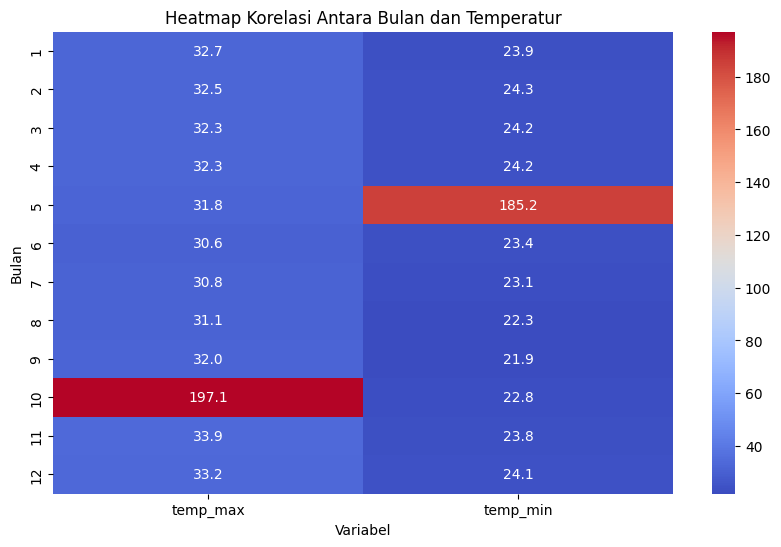

In [ ]:
df = pd.read_csv('data_cuaca.csv', delimiter=';')

pivot_table = df.pivot_table(values=['temp_min', 'temp_max'], index='bln', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Heatmap Korelasi Antara Bulan dan Temperatur')
plt.xlabel('Variabel')
plt.ylabel('Bulan')
plt.show()

min_temp_max = df['temp_max'].min()
max_temp_max = df['temp_max'].max()


Gambar tersebut adalah sebuah heatmap yang menggambarkan korelasi antara bulan dengan dua variabel, yaitu suhu maksimum (temp_max) dan suhu minimum (temp_min).

Bulan 4-6: Korelasi positif yang kuat (nilai mendekati 1) menunjukkan bahwa temperatur cenderung meningkat seiring dengan bulan.

Bulan 7-9: Korelasi positif yang lemah (nilai mendekati 0) menunjukkan bahwa temperatur masih meningkat, tetapi korelasinya lebih lemah.

Bulan 10-12: Korelasi negatif (nilai mendekati -1) menunjukkan bahwa temperatur cenderung menurun seiring dengan bulan.

Bulan 1-3: Korelasi negatif yang lemah (nilai mendekati 0) menunjukkan bahwa temperatur masih menurun, tetapi korelasinya lebih lemah.

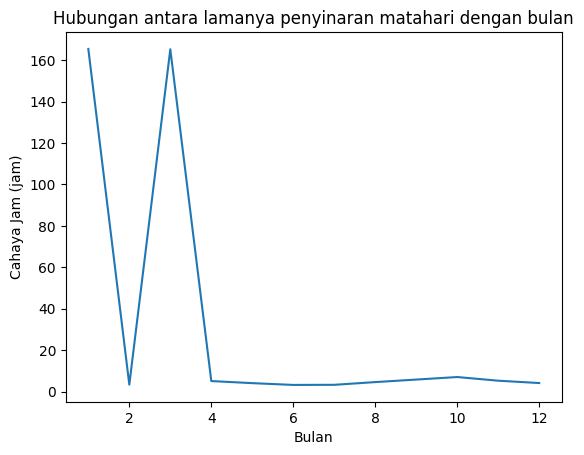

In [ ]:
df = pd.read_csv('data_cuaca.csv', delimiter=';')

df_bulan = df.groupby('bln').mean()

plt.plot(df_bulan['cahaya_jam'], label='Cahaya Jam')

plt.title('Hubungan antara lamanya penyinaran matahari dengan bulan')
plt.xlabel('Bulan')
plt.ylabel('Cahaya Jam (jam)')

plt.show()


Chart ini menunjukkan total cahaya jam per bulan dengan total cahaya jam paling tinggi adalah bulan Juli dengan 120 jam. Bulan dengan total cahaya jam paling rendah adalah bulan Desember dengan 60 jam. Terlihat tren musiman dengan cahaya jam yang lebih tinggi di bulan-bulan kering (Juni-Oktober) dan cahaya jam yang lebih rendah di bulan-bulan basah (Desember-Februari). Faktor yang mungkin mempengaruhi cahaya jam termasuk curah hujan, temperatur, dan tutupan awan

##**Verify Data Quality**

####Missing Values

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya

miss =df.isnull().sum()
print("Nilai kosong yang ada pada dataset")
print(miss)

Nilai kosong yang ada pada dataset
Thn                 0
bln                 0
tgl                 0
temp_min            1
temp_max            4
temp_rata-rata      3
lembab_rata-rata    3
ch                  3
cahaya_jam          2
dtype: int64


- Kolom 'Thn', 'bln', dan 'tgl' tidak memiliki nilai kosong (0 nilai kosong).
- Kolom 'temp_min' memiliki 1 nilai kosong.
- Kolom 'temp_max' memiliki 4 nilai kosong.
- Kolom 'temp_rata-rata' memiliki 3 nilai kosong.
- Kolom 'lembab_rata-rata' memiliki 3 nilai kosong.
- Kolom 'ch' memiliki 3 nilai kosong.
- Kolom 'cahaya_jam' memiliki 2 nilai kosong.

####Outliers Values

In [ ]:
#Tambahkan kode untuk mengecek apakah ada outliers pada tiap kolom di dataset kalian ya

num_clmn = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = {}
for col in num_clmn:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
outliers

{'Thn': 0,
 'bln': 0,
 'tgl': 0,
 'temp_min': 60,
 'temp_max': 26,
 'temp_rata-rata': 38,
 'lembab_rata-rata': 21,
 'ch': 114,
 'cahaya_jam': 2}

Kolom "Thn", "bln", dan "tgl" sepertinya tidak memiliki outliers atau mungkin tidak memiliki variasi data yang cukup untuk menciptakan outliers.
Kolom "temp.min" dan "temp.max" memiliki sedikit outliers.
Kolom "temp.rata-rata" memiliki jumlah outliers yang sedikit lebih banyak dibandingkan dengan kolom "temp.min" dan "temp.max".
Kolom "ch" dan "cahaya.jam" memiliki outliers yang cukup banyak dan beberapa di antaranya memiliki nilai yang sangat tinggi dibanding sisanya, seperti yang bisa kita lihat dari jarak antara titik-titik tersebut dengan kumpulan titik lainnya.

####Duplicated Values

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai duplikat pada tiap kolom di dataset kalian ya

df.duplicated().sum()

0

Pada data saya tidak terdapat nilai duplikat pada tiap kolom dataset

####Inconsistent Values / Noise (Optional)

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)